# **Deep Learning in the Cryosphere**

## Using deep neural networks to investigate subglacial water


PhD Proposal Talk, 12.30pm-1.00pm Tuesday, 11 December 2018

by [Wei Ji Leong](https://orcid.org/0000-0003-2354-1988)

Supervisors [Dr. Huw Horgan](https://orcid.org/0000-0002-4836-0078) and Dr. Brian Anderson

Antarctic Research Centre, Victoria University of Wellington, New Zealand

# Outline

- Research Aims
- Background information
  - Subglacial Hydrology
  - Deep Neural Networks
- DeepBedMap Project Initial Results
  - How to get a better BEDMAP for Antarctica?
  - Super Resolution Neural Network Model Design
  - Results at Pine Island Glacier focus area
- Next steps and Discussion

# 1. Research Aims

Apply **deep learning** to extract information from cryospheric **remote sensing** datasets, with a focus on Antarctic **subglacial hydrology**.
The aims are as follows:

1. Use a Super-image Resolution Convolutional Neural Network (SRCNN) to increase the spatial resolution of cryospheric datasets.

2. Locate subglacial lakes from integrated geophysical datasets using a Convolutional Neural Network (ConvNet).

3. Create a new inventory of Antarctic subglacial lakes, channels and aquifers.

![Bringing together Remote Sensing Data, Machine Learning Tools and Glaciological Science into Deep Learning in the Cryosphere](https://yuml.me/diagram/scruffy;dir:BT;scale:180/class/[Science|Glaciology]-%3E[Deep%20Learning%20in%20the%20Cryosphere],%20[Tool|Machine-Learning]-%3E[Deep%20Learning%20in%20the%20Cryosphere],%20[Data|Remote-Sensing]-%3E[Deep%20Learning%20in%20the%20Cryosphere])

# 2. Background

- How do glaciers flow?
- What are deep neural networks?

## How glaciers flow

Glaciers flow via a combination of three processes:

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Glacier_flow-mechanisms.png" alt="The three components that contribute to glacier flow - Ice deformation, sliding at the bed, and bed deformation" style="margin:0px auto;display:block" width="60%"/>

Of the three processes, those occuring **below the glacier** are the least understood.

See Cuffey & Paterson, 2010.

## Subglacial hydrology

- Water beneath a glacier plays an important role in increasing/decreasing basal slipperiness.

- Knowing **where** water lies beneath the Antarctic ice sheet will help inform **how fast** ice will drain into the sea.

- This feeds into the bigger picture question:
  - "How quickly will sea level rise and affect coastal communities around the globe?"

## Deep Neural Networks

An artificial neural network is a system made up of neurons, loosely based on biological neural networks.
The 'deep' term comes when you join two or more neural layers one after another.

<img src="https://screenshotscdn.firefoxusercontent.com/images/43c38c34-1ab8-44d8-b9d3-d4aa4d408855.png" alt="Schematic digram of a) 1-neuron, b) a shallow 1-layer network, c) a deep 2-layer network" style="margin:0px auto;display:block" width="80%"/>

See also Deep Learning *Nature* review paper by [LeCun, Bengio, & Hinton, 2015](https://doi.org/10.1038/nature14539) or Deep Learning book by [Goodfellow, Bengio, & Courville, 2016](http://www.deeplearningbook.org).

## Convolutional Neural Networks

Neurons that work spatially.
Kernels/Filters are learned to detect 'Features' like edges, corners, etc.
Subsequent convolutional layers build on these basic representations to learn complex high level features like texture, patterns and shapes.

<table><tr>
<td><img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif" alt="Animation of a Convolution operation"/></td>
<td><img src="https://deliveryimages.acm.org/10.1145/3070000/3065386/figs/f3.jpg" alt="Convolutional kernels from Krizhevsky et al. 2017"/></td>
</tr></table>

Left: Animation of Convolution Operation.
Right: Examples of Convolutional kernels from [Krizhevsky et al. 2017](https://doi.org/10.1145/3065386)

# 3. DeepBedMap Project

Using a deep neural network to better resolve the bed topography of Antarctica.

## Why do we need a better BEDMAP for Antarctica?

- Current bed topography map (BEDMAP2) has a coarse spatial resolution of **1000m**.
  - Actually it is a 5000m grid product resampled to 1000m.
  - The bed of Antarctica is poorly understood compared to the surface
  - E.g. There is now an **8m** digital surface elevation model of Antarctica

- Accurate mapping of subglacial lakes requires better knowledge of the bed!

- Higher resolution bed will also help to capture more processes in ice sheet models.

## How to get a better BEDMAP for Antarctica?

- We have high resolution bed elevation maps over **some** parts of Antarctica (collected using ice-penetrating radar surveys).

<img src="https://user-images.githubusercontent.com/23487320/49407666-392e9080-f7be-11e8-9788-061dc5040796.png" alt="Map of radio-echo-sounding datasets around Antarctica used in Gardner et al., 2018 paper" style="margin:0px auto;display:block" width="50%"/>

Figure showing Radio-echo-sounding datasets around Antarctica from [Gardner et al. 2018](https://doi.org/10.5194/tc-12-521-2018)

- We have high resolution surface maps over **practically all** of Antarctica (from optical, laser and radar satellites).

<img src="http://data.pgc.umn.edu/maps/antarctica/pgc/20/preview/REMA%20Map%20Poster%20Blank.jpg" alt="Cartographic Map of the Reference Elevation Model of Antarctica from Howat et al. 2018" style="margin:0px auto;display:block" width="50%"/>

Cartographic Map of the Reference Elevation Model of Antarctica from [Howat et al. 2018](https://doi.org/10.7910/DVN/SAIK8B)

## How about

- We **train** a neural network model at the places where we have **high resolution** data.
  - Model learns bed topography given other high resolution surface datasets.
  - High resolution groundtruth areas provide 'answer' to train the neural network.
      `X(Surface inputs) -- function(X) --> Y(Groundtruth bed)`

- **Apply** the trained model to **fill in the gaps** where there is little/no survey data.

    `X(Surface inputs) -- function(X) --> Y(High Resolution Bed)`

## Neural Network Model Training Set-up

<img src="https://yuml.me/diagram/scruffy;dir:LR;scale:180/class/[BEDMAP2 (1000m)]->[Neural Network model],[REMA (100m)]->[Neural Network model],[MEASURES Ice Flow Velocity (500m resampled)]->[Neural Network model],[Neural Network model]->[High res bed DEM (250m)],[High res bed DEM (250m)]->[Discriminator],[Groundtruth Image (250m)]->[Discriminator]" alt="3 input SRGAN model"/>

Inputs inspired by this equation: $\frac{dz}{dt} = M_b + \nabla \cdot u H$

where change in ice surface elevation $\frac{dz}{dt}$ is equal to mass balance $M_b$ plus divergence in velocity $\nabla \cdot u$ multiplied by ice thickness $H$ (surface elevation $z_s$ - bed elevation $z_b$)


Currently we have MEASURES Ice Velocity $\nabla \cdot u$, REMA $z_s$ and BEDMAP $z_b$ used as inputs.
'Assuming' steady state for elevation change $\frac{dz}{dt}$ and mass balance $M_b$.

## Neural Network Model Architecture

- Super Resolution Generative Adversarial Network (SRGAN) based on [Ledig et al. 2017](https://arxiv.org/abs/1609.04802v5)
- Currently built using Keras (Python-based deep learning library)

![SRGAN architecture - Generator Network](https://arxiv-sanity-sanity-production.s3.amazonaws.com/render-output/399644/images/used/jpg/generator.jpg)

- Feature Extraction --> Non-linear Mapping --> High Resolution Reconstruction

## The neural network model in training...

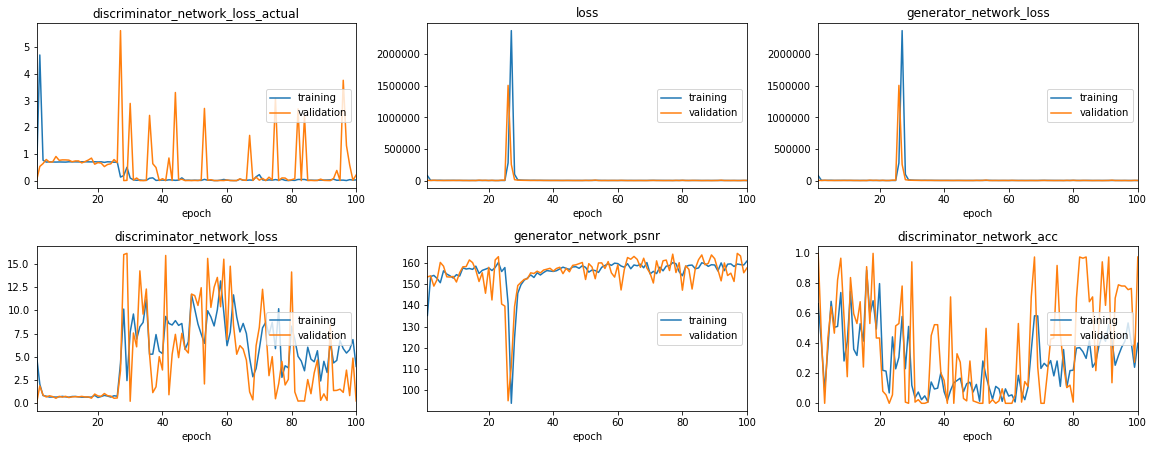

## Neural Network Training Areas

Currently trained on 2480 high resolution 8x8km image tiles (with overlaps) from Pine Island Glacier, Thwaites Glacier, Rutford Ice Stream, Siple Coast, Gamburtsev Subglacial Mountains.

<img src="https://user-images.githubusercontent.com/23487320/49705505-7d6cd580-fc83-11e8-9e37-be0046688a46.png" alt="Neural Network Training Areas around Antarctica" style="margin:0px auto;display:block" width="60%"/>

# Focus Area - Pine Island Glacier

- Fantastic high resolution grids from [Ice Sheet Stability Programme (iSTAR) surveys](https://istar-gis-features.data.bas.ac.uk/)

<table><tr>
<td><img src="https://media.springernature.com/lw900/springer-static/image/art%3A10.1038%2Fs41467-017-01597-y/MediaObjects/41467_2017_1597_Fig1_HTML.jpg" alt="3D view of high resolution radar surveys at Pine Island Glacier from Bingham et al. 2018" style="margin:0px auto;display:block" width="80%"/></td>
<td><img src="https://media.springernature.com/lw900/springer-static/image/art%3A10.1038%2Fs41467-017-01597-y/MediaObjects/41467_2017_1597_Fig2_HTML.jpg" alt="Comparing BEDMAP2 to high resolution radar surveys at Pine Island Glacier from Bingham et al. 2018" style="margin:0px auto;display:block" width="100%"/></td>
</tr></table>

High resolution radar surveys of Pine Island Glacier from [Bingham et al. 2017](https://doi.org/10.1038/s41467-017-01597-y).

## Inputs into trained Neural Network Model

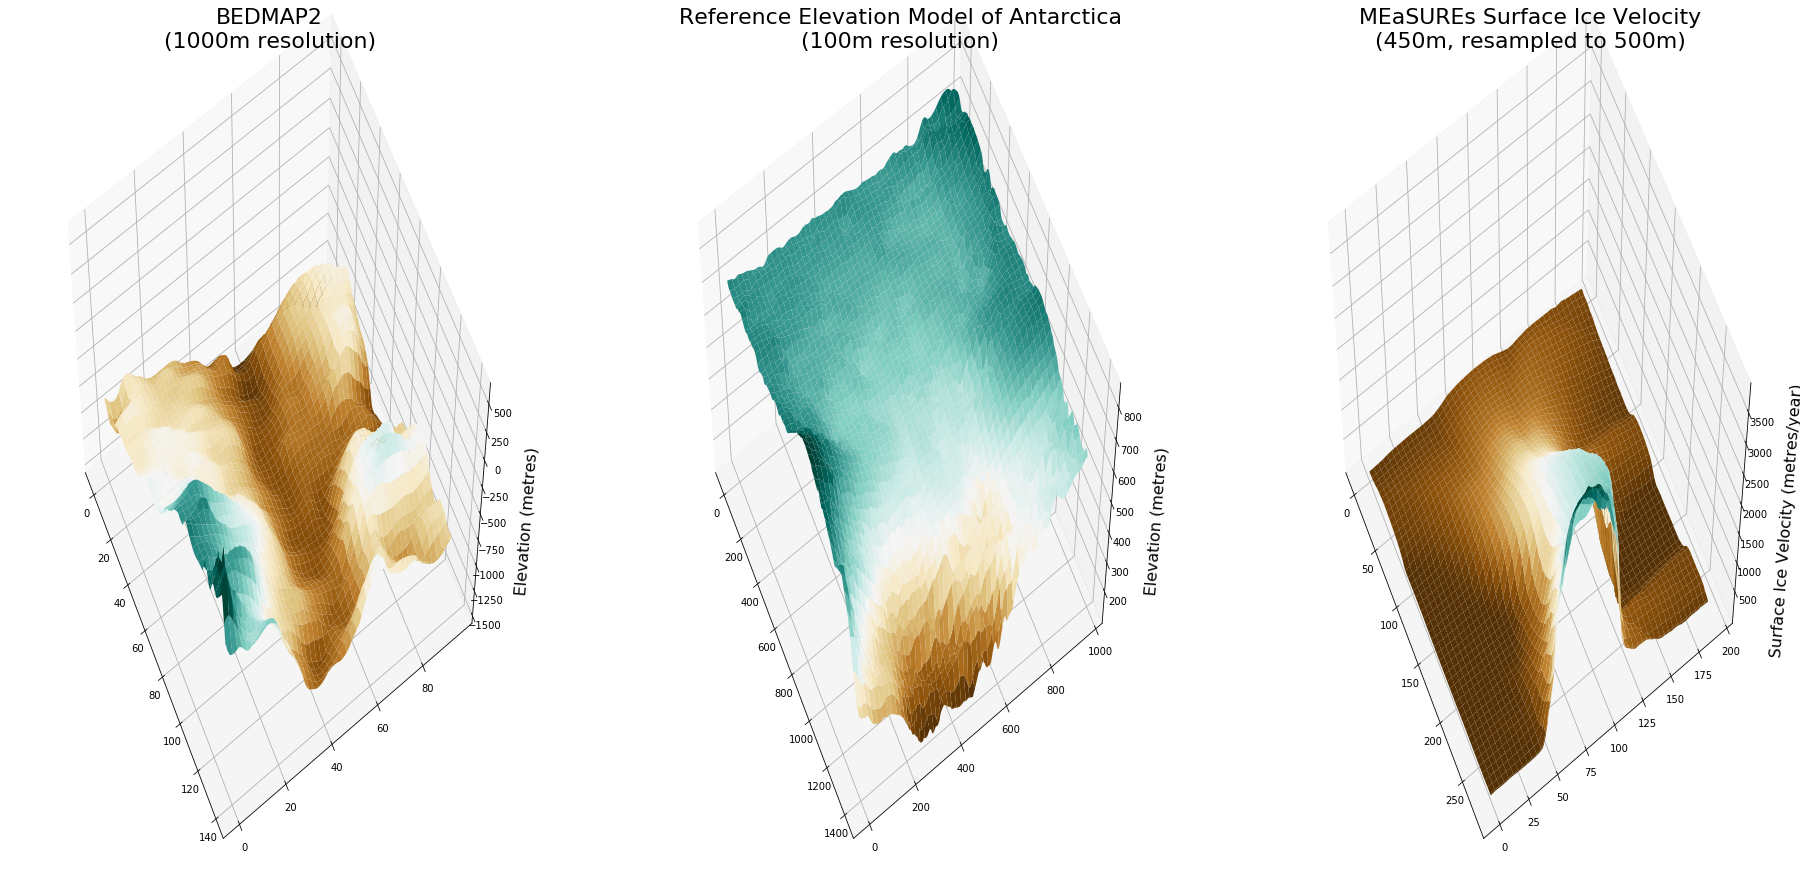

## Super Resolution results (4x upsampling) 

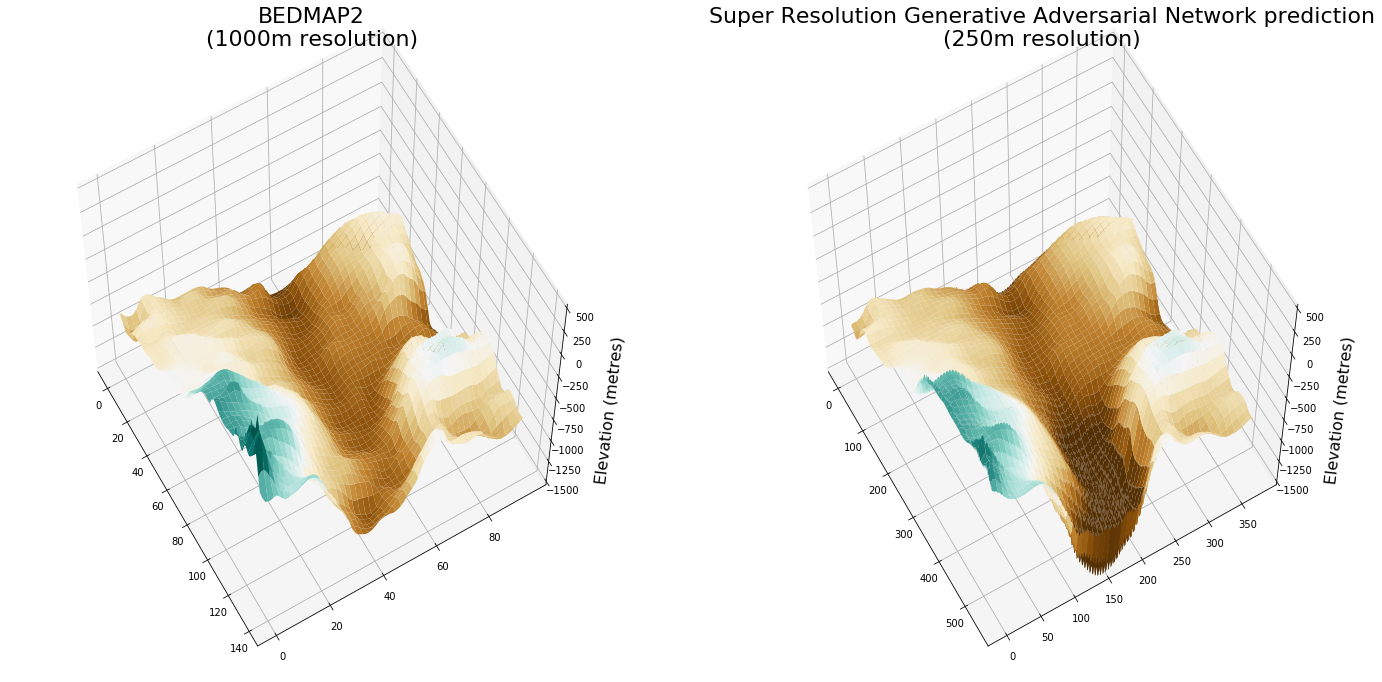

## Comparing elevation error along groundtruth survey track lines

Model trained on tiles (black), and validated on independent tracks at test regions (purple).

<img src="https://user-images.githubusercontent.com/23487320/49708043-cf692780-fc92-11e8-9063-317fda4d1c5d.png" alt="Neural Network Training and Test Areas around Pine Island Glacier" style="margin:0px auto;display:block" width="25%"/>

Output from Super Resolution model will be compared against a baseline Bicubic Spline interpolated product from BEDMAP2.

## Elevation Error inside training areas

Root Mean Squared Error (RMSE) of DeepBedMap (super resolution model) is lower than baseline (bicubic interpolation) by 4.10 metres.

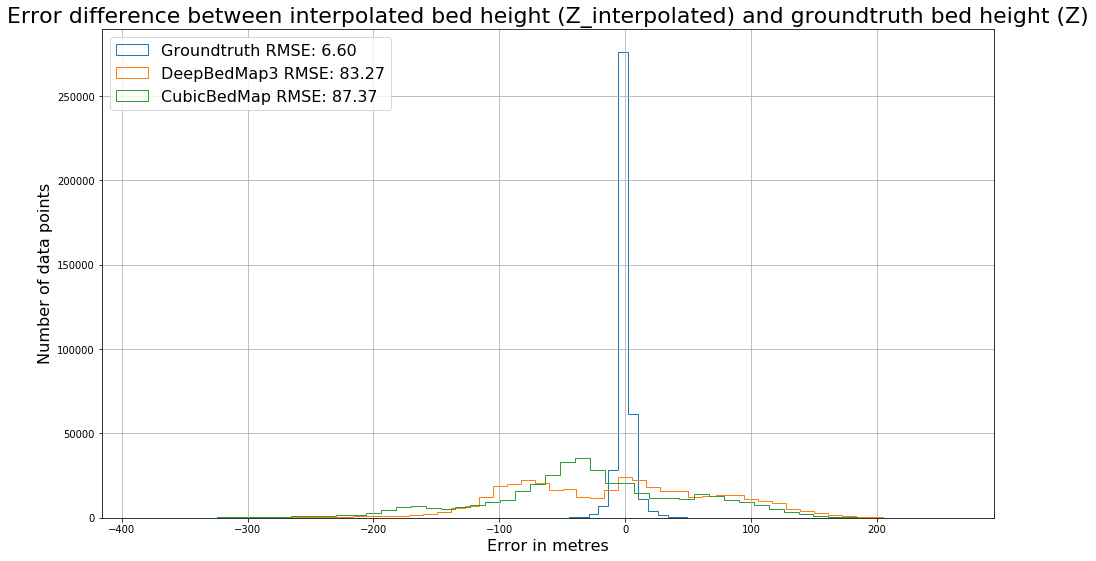

## Elevation Error inside test (validation) areas

Root Mean Squared Error (RMSE) of DeepBedMap (super resolution model) is lower than baseline (bicubic interpolation) by 8.35 metres.

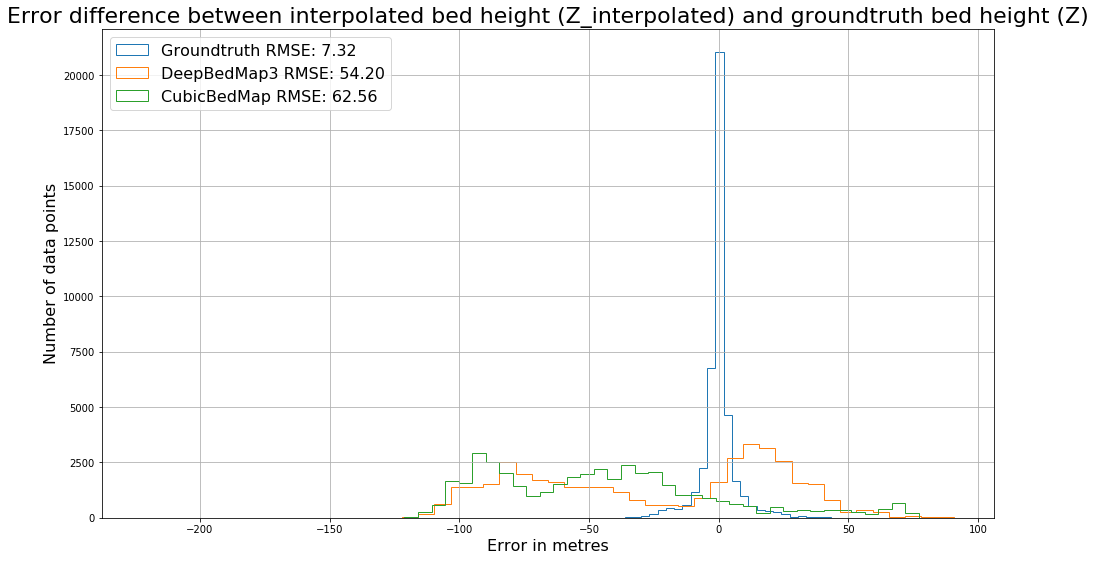

# 4. Next steps

- Improve model by adding other datasets informed by glaciological principles
  - I.e. the elevation change $\frac{dz}{dt}$ and mass balance $M_b$ terms in:
  $$\frac{dz}{dt} = M_b + \nabla \cdot u H$$
- Get more bed elevation datasets from other regions (need a BEDMAP3 inventory!)
- Refine neural network model via hyperparameter optimization
- Use DeepBedMap for catchment or continent-scale ice sheet models
- Adapt or Recreate a model for classifying subglacial water features

## References (page 1)

- Bingham, R. G., Vaughan, D. G., King, E. C., Davies, D., Cornford, S. L., Smith, A. M., … Shean, D. E. (2017). Diverse landscapes beneath Pine Island Glacier influence ice flow. Nature Communications, 8(1). https://doi.org/10.1038/s41467-017-01597-y

- Cuffey, K., & Paterson, W. S. B. (2010). The physics of glaciers (4th ed). Burlington, MA: Butterworth-Heinemann/Elsevier.

- Fretwell, P., Pritchard, H. D., Vaughan, D. G., Bamber, J. L., Barrand, N. E., Bell, R., … Zirizzotti, A. (2013). Bedmap2: improved ice bed, surface and thickness datasets for Antarctica. The Cryosphere, 7(1), 375–393. https://doi.org/10.5194/tc-7-375-2013

- Gardner, A. S., Moholdt, G., Scambos, T., Fahnstock, M., Ligtenberg, S., van den Broeke, M., & Nilsson, J. (2018). Increased West Antarctic and unchanged East Antarctic ice discharge over the last 7 years. The Cryosphere, 12(2), 521–547. https://doi.org/10.5194/tc-12-521-2018

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. Cambridge, Massachusetts: The MIT Press. Retrieved from http://www.deeplearningbook.org

## References (page 2)

- Howat, Ian, Morin, Paul, Porter, Claire, & Noh, Myong-Jong. (2018). The Reference Elevation Model of Antarctica [Data set]. Harvard Dataverse. https://doi.org/10.7910/DVN/SAIK8B

- Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2017). ImageNet classification with deep convolutional neural networks. Communications of the ACM, 60(6), 84–90. https://doi.org/10.1145/3065386

- LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436–444. https://doi.org/10.1038/nature14539

- Ledig, C., Theis, L., Huszar, F., Caballero, J., Cunningham, A., Acosta, A., … Shi, W. (2016). Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network. Retrieved from https://arxiv.org/abs/1609.04802v5

- Rignot, E., Mouginot, J., & Scheuchl, B. (2017). MEaSUREs InSAR-Based Antarctica Ice Velocity Map, Version 2. NASA National Snow and Ice Data Center DAAC. https://doi.org/10.5067/D7GK8F5J8M8R

# Thank you!

Questions or Comments?

P.S. These slides can be found at http://gist.github.com/weiji14 or contact me at weiji.leong@vuw.ac.nz